# Helper Functions Volume 2: (Data Processing)

Author: Koh Kok Bin  
Date: 06 Dec 2021

This notebook provides an overview of my thought process behind data processing, particularly in ETL (Extract, Transform and Load) pipelines as well as simple data retrieval and indexing. A good use case that can apply the learnings here is the processing steps you would often do in SAS so that the dataset can be used by other people (e.g. for AES, for SUT). The codes (from the Pandas package) here can cross apply very well to other areas where you deal routinely with data that involves some form of standardized processing of inputs <> outputs. 

### <a id = "VOL2_toc"> Table of contents:  </a>

- [Reference Materials -- This needs to be run so that Sections 1 to n can work.](#VOL2_refmat)
- [Help on codes](#VOL2_help)
- [Section 1: Selecting and Indexing data](#VOL2_selectdata)
    - [Part 1: loc and iloc](#VOL2_part1)
    - [Part 2: Selecting rows and columns (Conditions/NA)](#VOL2_part2)    
- [Section 2: Data Processing](#VOL2_dataprocess)  

#### <a id = "VOL2_refmat"> Reference Materials </a>
[Return to top](#VOL2_toc)  

The codes and explanations below are simplified from the Pandas and Python reference manual. The reference manual (__not to be confused with this current notebook__) is available for PST workgroup members to disseminate.  

The intranet link can be found here (ead/PST and io links):
- sites/ead2/Common/NAC/Workgroup/PST/Reference Materials/Documentation_Guides/Documentation_intranet.docx
- sites/io/SUT Compilation/g) Documentation/Python/Documentation_intranet.docx  

In [1]:
# Relevant packages. Should come installed with Python.
import os
import pandas as pd

In [3]:
# Get directory name of this file. Helpful to specify the directory of the file, 
# so you can also interact with the files in the same location via relative paths.

dirname = globals()["_dh"][0]
print(dirname)

C:\Users\kbkoh\Desktop\PST\helper


The dataset used in this volume is retrieved on 6th December 2021, from the internet link here:  
- https://data.gov.sg/dataset/resale-flat-prices  

This dataset refers to resale flat prices based on registration date from Jan-2017 onwards. Note that the HDB dataset is updated on a weekly basis. Hence, the results will be slightly different if you are using the updated datasets.

In [4]:
data_folder = "VOL2"
list_of_files = os.listdir(os.path.join(dirname, data_folder))
list_of_files2 = os.listdir(data_folder)

print(list_of_files, "\n", list_of_files2)

['adding_data.xlsx', 'data_process.xlsx', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'] 
 ['adding_data.xlsx', 'data_process.xlsx', 'resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']


In [5]:
files = [a for a in list_of_files if a.endswith(".csv")]
print(files)

['resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv']


In [6]:
# Replace function is meant to ensure sharepoint files will work.
# This code is more readable too.
# We only want the csv file. There are excel files inside too.
datafile = os.path.join(dirname, "VOL2", files[0]).replace("\\", "/")
df = pd.read_csv(datafile)

Jump to [Section 1](#VOL2_selectdata) or [Section 2](#VOL2_dataprocess)

#### <a id = "VOL2_help"> Help on what to fill in for the codes, or the codes themselves? </a> 

[Return to top](#VOL2_toc)

If you want more clarity in the codes. Example code (not run; can copy onto any empty cell and run it):

help(df.head) or df.head?  
help(pd.read_csv) or pd.read_csv?  

Note that implicitly I'm referencing 2 different kinds of 'objects' within Python. df is a DataFrame being read in by pd.read_csv. df is the same as 'pd.DataFrame' (i.e. DataFrame objects). pd.read_csv is a 'method' from the core pandas (renamed as pd in first cell) package. Hence, when you use help, if you have a dataframe or series, whose methods (aka codes) you want help with, can just do this (omit the call () in the method):

help(mydataframe.method) which is the same as help(pd.DataFrame.method) or pd.DataFrame.method?  
help(myseries.method) is the same as help(pd.Series.method) or myseries.method?


A good practice is to conduct prelim checks like the below to see if you've read in the data properly, or just to assess the kind of data you've read in. Most times you may not be able to view it via an Excel file or that it can be inconvenient to do so. Once you've read it in, can do a few steps like so:

.head()  
.describe()  
.info()  

In [7]:
df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [8]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,114623.000000,114623.000000,1.146230e+05
mean,97.858028,1995.025946,4.583912e+05
std,24.143134,13.403011,1.586183e+05
min,31.000000,1966.000000,1.400000e+05
25%,82.000000,1985.000000,3.430000e+05
50%,95.000000,1995.000000,4.280000e+05
75%,113.000000,2005.000000,5.400000e+05
max,249.000000,2019.000000,1.360000e+06


In [9]:
# show null entries.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114623 entries, 0 to 114622
Data columns (total 11 columns):
month                  114623 non-null object
town                   114623 non-null object
flat_type              114623 non-null object
block                  114623 non-null object
street_name            114623 non-null object
storey_range           114623 non-null object
floor_area_sqm         114623 non-null float64
flat_model             114623 non-null object
lease_commence_date    114623 non-null int64
remaining_lease        114623 non-null object
resale_price           114623 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 9.6+ MB


From here, we can roughly know that this dataframe has the columns as above, and has about 114k rows, of which some columns are integers (lease commence date) or floats (aka numbers with decimal points, like price). We will tackle all these in part 2, where we do data preprocessing.

_Tip: Create backups of the original dataset so you can 'roll back' the process to a prior version in the script. This helps especially when the user is in the phase of writing the script. For python, when you copy an object like so:_  

__df_copy = df.copy()__ 

You should be able to create a copy of the dataframe without affecting the original copy. However, if your df contains python objects such as lists, dictionaries or tuples, the update of the original dataframe for these data objects will be reflected in the dataframe. As we are working with 'normal' data (aka no objects in dataframe), this copy should be fine.

Take a look at Pandas' [reference manual](#VOL2_refmat), under:
- Pandas/reference/api/pandas.DataFrame.copy.html  

PS. Take note of the memory usage (can see this under .info()) and avoid doing backups too many times if the file size is big (> 5-10mb)

In [10]:
df1 = df.copy()

### <a id = "VOL2_selectdata"> Section 1: Selecting and Indexing Data  </a>

[Return to top](#VOL2_toc)  

Please skip to [section 2](#VOL2_dataprocess) if you have a good handle of selecting data. This is critical in preprocessing; without knowing how to find and select the data, it's very difficult to process it. There's a reason why data cleaning/processing takes up >70% of the time in the data science project.

This is crucial to understanding how best to conduct data preprocessing. Bulk of our mistakes and errors in writing code comes from the lack of understanding behind selecting the right data to filter, transform, impute or clean.  

This is mainly referenced from the [Pandas reference manual](#VOL2_refmat), under:  
- Pandas/user_guide/indexing.html

There are a few sections to this part:
- [Part 1: loc and iloc](#VOL2_part1)  
- [Part 2: Conditions/NA](#VOL2_part2)

There are a few methods to select different kinds of data in the dataset:  

- Selecting columns  
- Selecting rows  
- Selecting running rows or running columns  
- Selecting based on condition  
- Selecting NA values

In [11]:
# This returns a Series. A Series is a 1-dimensional dataset.
# You cannot add columns to a Series like you would a 2D DataFrame.
type(df1["town"].head())

pandas.core.series.Series

In [12]:
# Note the double square brackets returns a dataframe.
# Both have different methods that you can call.
type(df1[["town"]].head())

pandas.core.frame.DataFrame

In [13]:
# try the 2 codes separately and see the difference.
df1[["town"]].head()

,town
0,ANG MO KIO
1,ANG MO KIO
2,ANG MO KIO
3,ANG MO KIO
4,ANG MO KIO


In [14]:
df1["town"].head()

0    ANG MO KIO
1    ANG MO KIO
2    ANG MO KIO
3    ANG MO KIO
4    ANG MO KIO
Name: town, dtype: object

Generally speaking, if we want to process a column within a dataframe, we can simply use the former method (that returns a DataFrame). Returning a DataFrame object enables us to do more things with it, as opposed to a Series which is just a 1-dimensional array (like a list, or list-like). For example, you cannot add more columns to a Series object. You can do so with the DataFrame object. More on this later.

Other ways of selecting columns are based on indexing data using the following convention.As rows and columns variables are not defined, this cell will throw an error.

df1.loc[_rows_, _columns_]  
df1.iloc[_rows_, _columns_]

#### <a id = "VOL2_part1"> Part 1: loc and iloc </a>

[Return to top](#VOL2_toc), [Return to section top](#VOL2_selectdata)

loc = location-based indexing  
iloc = integer position based.  

We can simulate a simple example like the below cell. Take a look at the output. Columns A and B are clear, as is the index. The index is simply the label used to identify rows.

In [15]:
index_df = pd.DataFrame({"A": [0,1,2,3], "B": ["One", "Two", "Three", "Four"]})
index_df

,A,B
0,0,One
1,1,Two
2,2,Three
3,3,Four


In [19]:
print("This prints the first row: \n{}\n".format(index_df.loc[0, :]))
print("This prints the same first row: \n{}\n".format(index_df.loc[0]))
print("This prints the same first row: \n{}\n".format(index_df.iloc[0]))

This prints the first row: 
A      0
B    One
Name: 0, dtype: object

This prints the same first row: 
A      0
B    One
Name: 0, dtype: object

This prints the same first row: 
A      0
B    One
Name: 0, dtype: object



In [20]:
print("This prints the first Column: \n{}\n".format(index_df.loc[:, "A"]))
print("This prints the same first Column: \n{}\n".format(index_df["A"]))
print("This prints the same first Column: \n{}\n".format(index_df.iloc[:, 0]))

This prints the first Column: 
0    0
1    1
2    2
3    3
Name: A, dtype: int64

This prints the same first Column: 
0    0
1    1
2    2
3    3
Name: A, dtype: int64

This prints the same first Column: 
0    0
1    1
2    2
3    3
Name: A, dtype: int64



In [22]:
print("This prints the first 2 rows of col A: \n{}\n".format(index_df.loc[0:2, "A"]))
print("This prints the first 2 rows of col A: \n{}\n".format(index_df["A"].loc[:2])) # 0 not need as it is assumed.
print("This prints the first 2 rows of col A: \n{}\n".format(index_df.iloc[:3, 0]))

This prints the first 2 rows of col A: 
0    0
1    1
2    2
Name: A, dtype: int64

This prints the first 2 rows of col A: 
0    0
1    1
2    2
Name: A, dtype: int64

This prints the first 2 rows of col A: 
0    0
1    1
2    2
Name: A, dtype: int64



In [24]:
# Additional. See if you get it! The same rules for selecting data can also be used to set data.

index_df2 = index_df.copy()
index_df3 = index_df.copy()

index_df["A"].iloc[:2] = 5
index_df2.loc[:1, "A"] = 6
index_df3.iloc[:2, 0] = 7

print("This changes/sets the first 2 entries of column A: \n{}\n".format(index_df["A"].iloc[:2]))
print("Same: \n{}\n".format(index_df2.loc[:1, "A"])) # 0 not need as it is assumed.
print("Same: \n{}\n".format(index_df3.iloc[:2, 0]))


This changes/sets the first 2 entries of column A: 
0    5
1    5
Name: A, dtype: int64

Same: 
0    6
1    6
Name: A, dtype: int64

Same: 
0    7
1    7
Name: A, dtype: int64



There's a key difference between using iloc and loc, in that for loc, the slices are inclusive. This is why the same cells can be retrieved by these 2 codes:  
- index_df["A"].loc[:2]  
- index_df.iloc[:3, 0]

From the reference material: Pandas/user_guide/indexing.html#different-choices-for-indexing  
- *A slice object with labels 'a':'f' (Note that contrary to usual python slices, both the start and the stop are included, when present in the index!)*  

__Something for you to take note.__

We now know that loc and iloc requires different values to retrieve the same column. When you read the data, if index is not specified, the index will be created from 0 onwards to the length of your dataframe - 1. Given that in our example we are dealing with 114k rows. It can get tedious to use the generated index as the identifier of the particular row. People don't intuitively understand (or remember) what row 12895 means. We usually work based on what we want to find. Sales in a particular town? Exceeding particular transaction proces?  

Of course, there are cases where there's just 1 row out of 114k has an error, and there's no real unique groups of attributes that separate it clealy with main dataset. Even then, we can make use of functions relating to NA values to help us.

#### <a id = "VOL2_part2"> Part 2:  Selecting rows and columns (Conditions/NA) </a>

[Return to top](#VOL2_toc), [Return to section top](#VOL2_selectdata)  

How can we select the right conditions and data then? Let's think about a few examples using our resale data frame that we read in earlier.  

We generally want to slice/filter data by condition (aka boolean indexing; see: Pandas/user_guide/indexing.html#boolean-indexing). 

We can slice data a few ways:  

__Select all columns and rows with a given condition (e.g. column A = 0)__
- df[df["A"] == 0]

__Select all columns and rows with multiple conditions (e.g. column A = 0, B > 1)__
- df[(df["A"] == 0) & (df["B"] > 1)]  Note the parenthesis. You need to group conditions by () if there are > 1 conditions!

__Select specific columns and rows with multiple conditions (e.g. column A = 0, B > 1)__  
*note: because you are also indexing along columns (specific columns and not all), we need to bring in .loc*  
- df.loc[df[column] == a_value, columns_to_show]  

This is where it gets a little more complicated. What about numerical ranges? A list of values? Substrings? Dates?

[Example 1: All 3 room from AMK (Ang Mo Kio) (strings)](#VOL2_sect2_eg1)  
[Example 2: All 3 + 4 room AND resale price >= 200k but < 500k (string + float)](#VOL2_sect2_eg2)    
[Example 3: All sales in Punggol before November 2017 (string + datetime)](#VOL2_sect2_eg3)    
[Example 4: 90th percentile price of all Maisonette with remaining lease lesser than 72 years 04 months (string + float)](#VOL2_sect2_eg4)    
[Example 5 (Bonus!): Median town sale price with:](#VOL2_sect2_eg5)  
- towns starting with letter B OR ending with letter N/G OR has 2 Gs (need not be running), AND 
- prices that has 8 in them, AND  
- Floor area with 75 to 100 SQM, AND  
- Date = odd months + odd years (Jan, Mar, May, Jul, Sep, Nov) + odd years (2017, 2019, 2021).    

Each example has its own difficulties and quirks. See below cells for more annotation.  

In [27]:
# Not necessary. I like my column names to be uppercase so that I don't have to think about case sensitivity. 
# Plus, capitalising it makes it easier to see. 
# If you did not run this cell, you would have errors running the codes below (as they rely on uppercase columns).

df.columns = map(str.upper, df.columns)
df.columns

Index(['MONTH', 'TOWN', 'FLAT_TYPE', 'BLOCK', 'STREET_NAME', 'STOREY_RANGE',
       'FLOOR_AREA_SQM', 'FLAT_MODEL', 'LEASE_COMMENCE_DATE',
       'REMAINING_LEASE', 'RESALE_PRICE'],
      dtype='object')

##### <a id = "VOL2_sect2_eg1"> Example 1: 3 room from AMK.</a>

[Return to example](#VOL2_part2)  

2 conditions here. What does the user want?

- 3 room (from flat_type column), and
- Ang Mo Kio (from town column) 

We might first ask ourselves whether are there any mispellings or different wordings that mean 3-room.  

.unique() comes to mind, as it checks a column for unique values. Note that if you want to have 2 methods execute in the same cell, the result might not show (as the cell can only have 1 output at a time). To force it to show results from both methods, can do print.

In [28]:
# In case you didn't run the code above. If not the column names will throw an error.
df.columns = map(str.upper, df.columns)

In [29]:
print(df["FLAT_TYPE"].unique())
print(df["TOWN"].unique())

['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT PANJANG'
 'BUKIT TIMAH' 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG'
 'HOUGANG' 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'PASIR RIS' 'PUNGGOL' 'QUEENSTOWN' 'SEMBAWANG' 'SENGKANG' 'SERANGOON'
 'TAMPINES' 'TOA PAYOH' 'WOODLANDS' 'YISHUN']


In [30]:
# After checking. This is the code. Note the parenthesis.
amk_3rm = df.loc[(df["FLAT_TYPE"] == "3 ROOM") & (df["TOWN"] == "ANG MO KIO"), :]
#amk_3rm.head()
#amk_3rm.info()
#amk_3rm.describe()

# There are many more ways to churn out the same result. Some works best for string match.
# Some work better for numerical data.

In [31]:
# Some other ways to churn out the same result.
# This will be useful if you are using similar conditions across many queries.
# AKA you might want to check 3 room across other towns, or 5 rooms within Ang Mo Kio.
# Setting these variables will help remove the need to retype the same condition over and over again.
# These conditions are simply values that are True or False (Boolean), for the length of the specified column.
# When applied to the dataframe, it will retrieve rows that have both conditions 1 or 2 = True.

condition1 = df["FLAT_TYPE"] == "3 ROOM"
condition2 = df["TOWN"] == "ANG MO KIO"
amk_3rm_b = df.loc[condition1 & condition2, :]
#amk_3rm_b.head()
#amk_3rm_b.info()
#amk_3rm_b.describe()

In [32]:
# Just to show what it looks like.
condition1.head()

0    False
1     True
2     True
3     True
4     True
Name: FLAT_TYPE, dtype: bool

##### <a id = "VOL2_sect2_eg2"> Example 2: 3 + 4 room AND resale price of at least 200k but less than 500k.</a>

[Return to example](#VOL2_part2)  

Similar to example 1, there are 2 conditions (aka 2 columns) with which we have to filter by some criteria:  
- Flat type = 3 or 4 room  
- Resale price in range of 200k to 499.999k  

There are 3 sets of code that produce the same result (verifiable by the .describe() function). There's *a lot* more from where that came from. Don't worry, I originally didn't know these codes as well. All I did was to google!  

The only important point to this is the tradeoff in shorter lines of code vs readability. For new officers who are just starting to learn python, it may actually hinder their learning process if they start with the code for cheap_34rm_c. We need to understand the "why" behind each type of code being used, and appreciate the subtle differences between them.

In [33]:
# In case you didn't run the examples before
df.columns = map(str.upper, df.columns)

In [34]:
cheap_34rm = df.loc[((df["FLAT_TYPE"] == "3 ROOM") | (df["FLAT_TYPE"] == "4 ROOM")) & 
                    ((df["RESALE_PRICE"] >= 200000) & (df["RESALE_PRICE"] < 500000)), :]

# The example seems a little long, no? Imagine if your boss asks you about 5 rooms as well + other conditions...
# Let's try to shrink the code...

cheap_34rm_b = df.loc[(df["FLAT_TYPE"].isin(["3 ROOM", "4 ROOM"])) & (200000 <= df["RESALE_PRICE"]) & 
                      (df["RESALE_PRICE"] < 500000), :]

cheap_34rm_c = df.loc[(df["FLAT_TYPE"].isin(["3 ROOM", "4 ROOM"])) & 
                      (df["RESALE_PRICE"].between(200000, 499999.9)), :]

#cheap_34rm.info()
print(cheap_34rm.describe())
#cheap_34rm_b.info()
print(cheap_34rm_b.describe())
#cheap_34rm_c.info()
print(cheap_34rm_c.describe()) # The same as 34rm_b and 34rm

# What is between? See help(pd.Series.between, or help(df["COLUMN NAME"].between))

       FLOOR_AREA_SQM  LEASE_COMMENCE_DATE   RESALE_PRICE
count    61588.000000         61588.000000   61588.000000
mean        84.065253          1991.727983  358881.734207
std         15.016994            13.980498   69271.094206
min         51.000000          1966.000000  200000.000000
25%         68.000000          1981.000000  305000.000000
50%         90.000000          1987.000000  358000.000000
75%         94.000000          2002.000000  415000.000000
max        128.000000          2018.000000  499999.000000
       FLOOR_AREA_SQM  LEASE_COMMENCE_DATE   RESALE_PRICE
count    61588.000000         61588.000000   61588.000000
mean        84.065253          1991.727983  358881.734207
std         15.016994            13.980498   69271.094206
min         51.000000          1966.000000  200000.000000
25%         68.000000          1981.000000  305000.000000
50%         90.000000          1987.000000  358000.000000
75%         94.000000          2002.000000  415000.000000
max        128

##### <a id = "VOL2_sect2_eg3"> Example 3: I want all sales in Punggol before November 2017</a>

[Return to example](#VOL2_part2)  

This is something different as it involves a Date / Time range. This is not something that officers come into contact with all the time, and it may seem difficult to slice dataframes by range. As Datetime is an important tool in every officer's data science capabilities, this guide will be in a separate volume. Please read that guide first so that you can understand the codes better.  

If you're not using datetime formats extensively in your dateset, can also consider other workarounds like those shown below.

In [35]:
# In case you didn't run the examples before
df.columns = map(str.upper, df.columns)

In [37]:
# But Joey, why can't we just do string matches? Well yea we can, but more on that later.
# Does not seem very scalable no? What if you need 12 months? Gets tedious
df.loc[df["MONTH"].isin(["2017-12", "2017-11", "2017-10"]), :].head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
15159,2017-10,ANG MO KIO,3 ROOM,571,ANG MO KIO AVE 3,01 TO 03,67.0,New Generation,1979,60 years 08 months,248000.0
15160,2017-10,ANG MO KIO,3 ROOM,451,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1979,60 years 10 months,260000.0
15161,2017-10,ANG MO KIO,3 ROOM,451,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,60 years 09 months,262000.0
15162,2017-10,ANG MO KIO,3 ROOM,232,ANG MO KIO AVE 3,04 TO 06,67.0,New Generation,1977,59 years,265000.0
15163,2017-10,ANG MO KIO,3 ROOM,606,ANG MO KIO AVE 5,10 TO 12,67.0,New Generation,1980,61 years 08 months,265000.0


In [38]:
df_time = df.copy() # For purposes of this exercise.

In [39]:
# Allow the function to try and parse the months. Note that they included a day format as well.
print(pd.to_datetime(df_time["MONTH"]).head(2))
print(pd.to_datetime(df_time["MONTH"], format = "%Y-%m").head(2))
print(pd.to_datetime(df_time["MONTH"], infer_datetime_format = True).head(2))

# These 3 are the same. Though if your date formats are different, will produce different results. 
# For certainty in your results, consider providing the format (2nd line)
# to tell python how to parse the datetime.

0   2017-01-01
1   2017-01-01
Name: MONTH, dtype: datetime64[ns]
0   2017-01-01
1   2017-01-01
Name: MONTH, dtype: datetime64[ns]
0   2017-01-01
1   2017-01-01
Name: MONTH, dtype: datetime64[ns]


In [41]:
df_time["DATE"] = pd.to_datetime(df_time["MONTH"], format = "%Y-%m") 
# Note that the final result is in YYYY-MM-DD, which is the normal convention.
print(df_time["DATE"].head(1), "\n")

# To filter time, ensure that you use to_datetime, or that the column dtype is in datetime64[ns].
# Thereafter, you can filter it like you would a numerical range :)
pgl_pre_dec17_a = df_time.loc[(df_time["TOWN"] == "PUNGGOL") & (df_time["DATE"] < "2017-12-01"), :]
pgl_pre_dec17_a.describe()

0   2017-01-01
Name: DATE, dtype: datetime64[ns] 



,FLOOR_AREA_SQM,LEASE_COMMENCE_DATE,RESALE_PRICE
count,1190.000000,1190.000000,1190.000000
mean,98.764706,2009.113445,450238.088134
std,12.593540,4.505271,68908.778459
min,46.000000,2002.000000,243000.000000
25%,93.000000,2004.000000,405000.000000
50%,95.000000,2012.000000,440000.000000
75%,110.000000,2013.000000,488888.000000
max,149.000000,2014.000000,860000.000000


In [42]:
df_time = df.copy() # For purposes of this exercise.

In [43]:
# Workaround (if you don't want to touch datetime formates and just leave it as string)
df_time = df_time.rename(columns = {"MONTH": "DATE"}) # So that the MONTH column doesn't clash.
df_time["YEAR"] =  df_time["DATE"].str[:4].astype(int)
df_time["MONTH"] =  df_time["DATE"].str[-2:].astype(int) # -2 = second element from end of list.

df_time[["YEAR", "MONTH", "DATE"]].head(2)

# Making the values in integer value will help us in filtering the desired ranges better.
# However, this isn't exactly appropriate when dealing with datetime, as it isn't scalable.
# Harder to manipulate time when the underlying data is that of a string or number.

,YEAR,MONTH,DATE
0,2017,1,2017-01
1,2017,1,2017-01


In [44]:
pgl_pre_dec17 = df_time.loc[(df_time["YEAR"] <= 2017) & (df_time["MONTH"] < 12) &
                            (df_time["TOWN"] == "PUNGGOL"), :]

pgl_pre_dec17.describe()
# Year and Month is included in this describe function call as we converted them into numerical values.

,FLOOR_AREA_SQM,LEASE_COMMENCE_DATE,RESALE_PRICE,YEAR,MONTH
count,1190.000000,1190.000000,1190.000000,1190.0,1190.000000
mean,98.764706,2009.113445,450238.088134,2017.0,6.633613
std,12.593540,4.505271,68908.778459,0.0,2.981053
min,46.000000,2002.000000,243000.000000,2017.0,1.000000
25%,93.000000,2004.000000,405000.000000,2017.0,4.000000
50%,95.000000,2012.000000,440000.000000,2017.0,7.000000
75%,110.000000,2013.000000,488888.000000,2017.0,9.000000
max,149.000000,2014.000000,860000.000000,2017.0,11.000000


##### <a id = "VOL2_sect2_eg4">Example 4: 90th percentile price of all Maisonette with remaining lease lesser than 72 years 04 months (as of Dec-2021 aka existing dataset) </a>
[Return to example](#VOL2_part2)  

This is one step more complicated than Example 3. Let's have a good think about this problem.  

- Less than 72 years 04 months. Can remaining lease column be used?

In [45]:
df.columns

Index(['MONTH', 'TOWN', 'FLAT_TYPE', 'BLOCK', 'STREET_NAME', 'STOREY_RANGE',
       'FLOOR_AREA_SQM', 'FLAT_MODEL', 'LEASE_COMMENCE_DATE',
       'REMAINING_LEASE', 'RESALE_PRICE'],
      dtype='object')

In [46]:
# This can also be used to slice data but I find that it is quite messy.
# Either case, we can't use this as it only has years.
df.LEASE_COMMENCE_DATE.head() 

0    1979
1    1978
2    1980
3    1980
4    1980
Name: LEASE_COMMENCE_DATE, dtype: int64

In [47]:
# Let's process it to isolate the years and months, like example 3.
lease_list = df["REMAINING_LEASE"].to_list()

newlist = []
for a in lease_list:
    newlist.append(a.split())
print(newlist[0:3])

[['61', 'years', '04', 'months'], ['60', 'years', '07', 'months'], ['62', 'years', '05', 'months']]


In [48]:
print(newlist[0][2])

04


In [49]:
# Another way to do it. This is called list comprehension.
# Don't use it if you're not 100% confident with this code.

lease_list = df["REMAINING_LEASE"].to_list()
lease_list_split = [a.split() for a in lease_list]
print(lease_list_split[:3])

[['61', 'years', '04', 'months'], ['60', 'years', '07', 'months'], ['62', 'years', '05', 'months']]


In [50]:
yr_list, mth_list = [], []
for a in newlist:
    yr_list.append(a[0])
    print(a)
    mth_list.append(a[2])

['61', 'years', '04', 'months']
['60', 'years', '07', 'months']
['62', 'years', '05', 'months']
['62', 'years', '01', 'month']
['62', 'years', '05', 'months']
['63', 'years']


IndexError: list index out of range

Why is there an error above? Do you know how to work around it? It seems that there are some entries without month data. Does that mean they are 00 months? If a particular row is left with 63 years on its lease, should we do 63 years 00 months or 62 years 12 months?

In [52]:
df.loc[df["REMAINING_LEASE"].str.contains("12 months"), :] #returns empty

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE


In [53]:
df.loc[df["REMAINING_LEASE"].str.endswith("years"), :].head(4)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
5,2017-01,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,01 TO 03,68.0,New Generation,1981,63 years,275000.0
15,2017-01,ANG MO KIO,3 ROOM,230,ANG MO KIO AVE 3,04 TO 06,67.0,New Generation,1978,60 years,298000.0
18,2017-01,ANG MO KIO,3 ROOM,441,ANG MO KIO AVE 10,07 TO 09,67.0,New Generation,1979,61 years,306000.0
22,2017-01,ANG MO KIO,3 ROOM,432,ANG MO KIO AVE 10,10 TO 12,67.0,New Generation,1979,61 years,325000.0


In [54]:
yr_list, mth_list = [], []
for a in newlist:
    yr_list.append(int(a[0]))
    
    if len(a) > 2: # Meaning have at least 3 parts, e.g. 60 years xx months
        mth_list.append(int(a[2]))
    else:
        mth_list.append(0) # If want to impute 12, have to reduce the year count by 1.

In [55]:
df_eg4 = df.copy()

In [56]:
df_eg4 = df_eg4.rename(columns = {"MONTH":"REG_MONTH"})

In [57]:
df_eg4["YEAR"] = yr_list
df_eg4["MONTH"] = mth_list
df_eg4.head()

,REG_MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE,YEAR,MONTH
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,61,4
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,60,7
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,62,5
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,62,1
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,62,5


In [58]:
df_eg4_ans = df_eg4.loc[(df_eg4["YEAR"] <= 72) & (df_eg4["MONTH"] < 5) & 
           (df_eg4["FLAT_MODEL"].str.contains("Maisonette")), "RESALE_PRICE"]

In [59]:
# Fun fact: While writing this notebook, I didn't know what code to use for quantile 
# (thought .describe could do the trick). Went to google "90th percentile pandas"
# Got the answer in 5 seconds. Try it!
df_eg4_ans.quantile(0.9)

# How to verify?

890000.0

In [63]:
len(df_eg4_ans.loc[df_eg4_ans >= 890000])

123

In [64]:
len(df_eg4_ans)
# Seems to check out.. as only 123 entries are above the price. Interesting exercise.

1201

In [66]:
%matplotlib inline

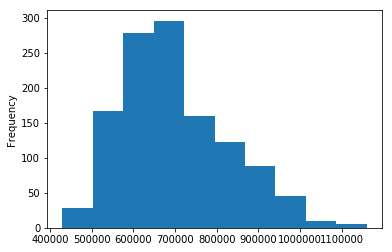

In [68]:
df_eg4_ans.plot.hist() # Didn't know you could plot this, could you? See help(pd.DataFrame.plot)

# Requires %matplotlib inline in order for plots to be rendered in the Notebook itself.

##### <a id = "VOL2_sect2_eg5"> Example 5 (Bonus!): Median town sale price </a> 

[Return to example](#VOL2_part2)  

- towns starting with letter B OR ending with letter N/G OR has 2 Gs (need not be running letters), AND 
- prices that has 8 in them, AND  
- Floor area with 75 to 100 SQM, AND  
- Date = odd months + odd years.  

Don't shoot the messenger! Some bosses *are* like that, and their requests are beyond ridiculous. If you're able to do this with ease, then I think you're quite proficient in data processing already. The tools I share in the 5 examples will likely encompass 95% of the data processing requirements. What is really important is for you to internalize the mental model and the processes inherent in my examples. Without good data cleaning practices, your AI/ML models will be 'dirty' and won't be accurate.  

Without further ado, let's tackle the conditions individually.

In [69]:
df_eg5 = df.copy()

In [70]:
# Just in case you didn't go through the other 4 examples.
df_eg5.columns = map(str.upper, df_eg5.columns)
df_eg5.columns

Index(['MONTH', 'TOWN', 'FLAT_TYPE', 'BLOCK', 'STREET_NAME', 'STOREY_RANGE',
       'FLOOR_AREA_SQM', 'FLAT_MODEL', 'LEASE_COMMENCE_DATE',
       'REMAINING_LEASE', 'RESALE_PRICE'],
      dtype='object')

There's a few AND conditions. If for example you would like a entry that is from Serangoon, AND floor area with 88 SQM, we can actually filter out all serangoon entries first, THEN find those with floor area of 88 SQM.  

For OR conditions, it's not so straightforward, since can be either from serangoon OR floor area == 88 SQM (but not from serangoon). We can't filter them one by one, but have to do so together. To better appreciate this, we can do all the conditions above together (or we can do our best to try...)  

In [72]:
# Note that not all string manipulation require ReGex. But they will come in handy.
# Some Pandas methods don't accept Regex.
# It is hard to show *all* RegEx techniques. 
# You would have to try and learn and tinker with it yourself :)
# Helpful internet link:
# https://www.mpi.nl/corpus/html/trova/ch01s04.html

# towns starting with letter B
condition1a = df_eg5["TOWN"].str.contains("^B")
#condition1a_2 = df_eg5["TOWN"].str.startswith("B") # Same, no Regex used.

# Towns ending with letter N/G. Note the $ is placed at the back. What do they mean?
condition1b = df_eg5["TOWN"].str.contains("[NG]$")

# Without RegEx. the functions: endswith and startswith do not accept regex. Hence codes are longer.
# condition1b_2 = df_eg5["TOWN"].str.endswith("N") | df_eg5["TOWN"].str.endswith("G")

# Next level of RegEx. See the website above.
# Even I'm not an expert here. But, it's useful to at least know the basics. 
condition1c = df_eg5["TOWN"].str.contains(("G.*G"))
# condition1c_2 = df_eg5.loc[df_eg5["TOWN"].str.count("G") == 2

In [74]:
# Why is there no need for parenthesis here?
# condition1a 1b and 1c has been reduced to an array.
# Essentially, you can think of boolean indexing like a SUMPRODUCT formula function, with True = 1 and False = 0
# Which rows are true for ALL conditions? That will be shown here.
df_eg5a = df_eg5.loc[condition1a | condition1b | condition1c, :]

df_eg5a["TOWN"].unique()

array(['BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH', 'BUKIT PANJANG',
       'BUKIT TIMAH', 'CHOA CHU KANG', 'GEYLANG', 'HOUGANG', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'YISHUN'],
      dtype=object)

In [75]:
# If you wish to use string methods on a numerical value, 
# Need to convert them into string first.
# Do note that as you only converted them into a string for the condition
# The conversion to string isn't retained in df_eg5b
df_eg5b = df_eg5a.loc[df_eg5a["RESALE_PRICE"].astype(str).str.contains("8"), :]

# Still decimal place aka float
df_eg5b["RESALE_PRICE"].dtype

dtype('float64')

In [76]:
len(df_eg5b)

20045

In [77]:
df_eg5b["FLOOR_AREA_SQM"].unique() # Just to check how I will find the exact SQM

array([ 45. ,  59. ,  68. ,  63. ,  70. ,  60. ,  82. ,  90. ,  91. ,
        84. , 105. ,  92. , 120. , 143. ,  83. ,  95. , 121. , 146. ,
        73. ,  67. ,  69. , 102. , 103. , 155. , 144. ,  34. ,  65. ,
        77. , 100. ,  85. , 115. , 134. , 119. , 101. ,  93. , 104. ,
       106. , 123. , 110. , 124. , 141. ,  56. ,  61. ,  72. , 108. ,
       117. , 122. , 140. , 148. ,  97. ,  98. , 114. , 113. , 118. ,
       116. , 111. ,  96. , 112. , 153. ,  64. ,  74. , 142. , 164. ,
       136. , 125. , 132. , 149. ,  80. ,  99. ,  89. , 128. , 154. ,
        76. , 152. , 138. , 156. , 130. ,  87. , 131. ,  94. , 127. ,
       145. , 147. ,  31. ,  75. , 129. ,  60.3,  71. ,  66. , 137. ,
        46. , 126. ,  50. ,  47. , 109. , 107. ,  88. ,  81. ,  57. ,
       135. ,  86. ,  48. , 151. ,  40. , 150. , 165. , 157. , 139. ,
        44. ,  52. , 133. , 163. ,  55. ,  53. , 215. ,  58. , 176. ,
        62. ,  42. ,  78. ,  63.1, 160. , 182. , 181. ,  54. , 169. ,
        51. ,  79. ,

In [78]:
df_eg5c = df_eg5b.loc[df_eg5b["FLOOR_AREA_SQM"].between(75.0, 100.0), :]

In [79]:
df_eg5c.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
85,2017-01,BEDOK,3 ROOM,423,BEDOK NTH AVE 1,10 TO 12,82.0,New Generation,1979,61 years,358000.0
91,2017-01,BEDOK,4 ROOM,34,BEDOK STH AVE 2,10 TO 12,90.0,Improved,1977,59 years 08 months,358000.0
92,2017-01,BEDOK,4 ROOM,7,BEDOK STH AVE 2,04 TO 06,82.0,Improved,1976,58 years,358000.0
94,2017-01,BEDOK,4 ROOM,80,BEDOK NTH RD,01 TO 03,91.0,New Generation,1978,60 years 05 months,380000.0
95,2017-01,BEDOK,4 ROOM,78,BEDOK NTH RD,04 TO 06,91.0,New Generation,1978,60 years 07 months,382000.0


In [80]:
# Date = odd months + odd years. 
# Need to do some simple transformation so that we can filter properly
df_eg5d = df_eg5c.rename(columns = {"MONTH":"REG_DATE"})
df_eg5d["MONTH"] = df_eg5d["REG_DATE"].str.split("-").str[1].astype(int)
df_eg5d["YEAR"] = df_eg5d["REG_DATE"].str.split("-").str[0].astype(int)

df_eg5d.head()

,REG_DATE,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE,MONTH,YEAR
85,2017-01,BEDOK,3 ROOM,423,BEDOK NTH AVE 1,10 TO 12,82.0,New Generation,1979,61 years,358000.0,1,2017
91,2017-01,BEDOK,4 ROOM,34,BEDOK STH AVE 2,10 TO 12,90.0,Improved,1977,59 years 08 months,358000.0,1,2017
92,2017-01,BEDOK,4 ROOM,7,BEDOK STH AVE 2,04 TO 06,82.0,Improved,1976,58 years,358000.0,1,2017
94,2017-01,BEDOK,4 ROOM,80,BEDOK NTH RD,01 TO 03,91.0,New Generation,1978,60 years 05 months,380000.0,1,2017
95,2017-01,BEDOK,4 ROOM,78,BEDOK NTH RD,04 TO 06,91.0,New Generation,1978,60 years 07 months,382000.0,1,2017


In [83]:
# to see the value type of REG_DATE 
df_eg5d["REG_DATE"].str.split("-").str[1].head()

85    01
91    01
92    01
94    01
95    01
Name: REG_DATE, dtype: object

In [86]:
# Final requirement - odd months and odd years
# How do you think we should go about doing this?
# What function checks for odd and even numbers?

print("Method 1: average price {}\nMethod2: Average price = {}".format(df_eg5d.loc[df_eg5d["MONTH"] % 2 != 0, ["RESALE_PRICE"]].mean(), df_eg5d.loc[~df_eg5d["MONTH"].mod(2).eq(0), ["RESALE_PRICE"]].mean()))

Method 1: average price RESALE_PRICE    486712.849268
dtype: float64
Method2: Average price = RESALE_PRICE    486712.849268
dtype: float64


In [88]:
# Both yields the same result.
# What does % do here?
# Why is .mod same as %? Is it modulo?
# What is .eq? Equal? Why is there a ~ sign in front? What does the operator do? 
df_eg5d_end = df_eg5d.loc[df_eg5d["MONTH"] % 2 != 0, :]
#df_eg5d_end2 = df_eg5d.loc[~df_eg5d["MONTH"].mod(2).eq(0), :]

In [89]:
df_eg5d_end[["FLOOR_AREA_SQM", "RESALE_PRICE"]].describe()
#df_eg5d_end2[["FLOOR_AREA_SQM", "RESALE_PRICE"]].describe()

,FLOOR_AREA_SQM,RESALE_PRICE
count,3837.000000,3.837000e+03
mean,91.201720,4.867128e+05
std,4.456307,1.501446e+05
min,75.000000,2.580000e+05
25%,90.000000,3.820000e+05
50%,92.000000,4.480000e+05
75%,93.000000,5.258880e+05
max,100.000000,1.018000e+06


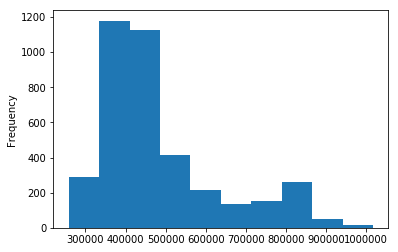

In [90]:
df_eg5d_end["RESALE_PRICE"].plot.hist() # Didn't know you could plot this, could you? See help(pd.DataFrame.plot)

# the code %matplotlib inline is required before you plot anything for the first time to render the plot in the Notebook.

In [91]:
df_eg5d_end.RESALE_PRICE.quantile()

448000.0

### <a id = "VOL2_dataprocess"> Section 2: Data Processing </a>  
[Return to top](#VOL2_toc)  

Now that we've gone through how to select and index data, we can begin to clean them and make them ready for the next step of any data project - Exploratory Data Analysis (EDA). Still blur? Jump back to [section 1](#VOL2_selectdata).  

This guide isn't meant to be comprehensive, as I can't write out processing steps for all data conceivable. However, having interacted with many datasets, I find that these are the codes that I use more commonly. They are also important tools to learn and have in any data analyst's toolkit.  

In [92]:
# Run this first before every example
df2 = df.copy()

I have broken them down into broad categories based on the data itself:
- [Renaming and Replacing data (loc, iloc, rename, replace, map, apply)](#VOL2_part2_cat1)  
- [Missing Data (fillna, dropna)](#VOL2_part2_cat2) -- HDB data not needed    
- [Adding Data (join/merge/concat/append)](#VOL2_part2_cat3)  
- [Table Transformations (melt/cast/transpose/reshape)](#VOL2_part2_cat4)    
- [Summary Data (groupby, value_counts)](#VOL2_part2_cat5)  

Just opened this file? Jump back [here](#VOL2_refmat) to load the data and packages

#### <a id = "VOL2_part2_cat1"> Renaming and Replacing Data (loc, iloc, rename, replace, map, apply) </a>  
[Return to section top](#VOL2_dataprocess)  

We often want to replace data (or column names) to process them. This should be the core skill of any data analyst.  

In [93]:
# First things first
df2.columns = map(str.upper, df2.columns)
print(df2.columns)

Index(['MONTH', 'TOWN', 'FLAT_TYPE', 'BLOCK', 'STREET_NAME', 'STOREY_RANGE',
       'FLOOR_AREA_SQM', 'FLAT_MODEL', 'LEASE_COMMENCE_DATE',
       'REMAINING_LEASE', 'RESALE_PRICE'],
      dtype='object')


Let's try to make it easier to analyse the storey range. Since the ranges are in 3s (see .unique()), we can make life easier by using a middle floor range since it won't matter much if the floor is 10 or 11 or 12. Thereafter, we can code it into categories (low, mid, high) so that its easier to visualise.

In [94]:
df2["STOREY_RANGE"].unique()

array(['10 TO 12', '01 TO 03', '04 TO 06', '07 TO 09', '13 TO 15',
       '19 TO 21', '22 TO 24', '16 TO 18', '34 TO 36', '28 TO 30',
       '37 TO 39', '49 TO 51', '25 TO 27', '40 TO 42', '31 TO 33',
       '46 TO 48', '43 TO 45'], dtype=object)

In [97]:
# To do this, we can either use a function (if you intend to do it more than once) or just lines of code

def getmid(string, separator = " TO "):
    ''' String should be in the form of xx<>yy where xx and yy are zero-padded integers 01 or 10 or 19
        The <> represents the 'separator' which the user would have to define.
        The default separator is " TO " inclusive of one space on both sides.
    '''
    tot = int(string.split(separator)[0]) + int(string.split(separator)[1])
    mid = int(tot/2)
    return mid

getmid("3 TO 5")

# Note that you can just do a one liner by compressing the codes into the return statement.
# That isn't as readable though.
# The function can also be abstracted out. The column can be converted to a list
# A for loop can be created to do the same operations.

4

Functions are meant to be applied to a value. It can also be applied to a list of values iteratively. If applied to a column, we would use map or apply. Let's try it.

In [98]:
df2["STOREY_RANGE"][:10] # to compare

0    10 TO 12
1    01 TO 03
2    01 TO 03
3    04 TO 06
4    01 TO 03
5    01 TO 03
6    04 TO 06
7    04 TO 06
8    04 TO 06
9    01 TO 03
Name: STOREY_RANGE, dtype: object

In [99]:
test_map = df2["STOREY_RANGE"][:10].map(getmid) 
# you can also map dictionaries to 'rename' or 'change' values based on the mapping. More on that later.
test_apply = df2["STOREY_RANGE"][:10].apply(getmid)
print(test_map)
print(test_apply)

# Now that we're satisfied with the results (as they are equal and accurate), 
# we can apply it to the whole column.

0    11
1     2
2     2
3     5
4     2
5     2
6     5
7     5
8     5
9     2
Name: STOREY_RANGE, dtype: int64
0    11
1     2
2     2
3     5
4     2
5     2
6     5
7     5
8     5
9     2
Name: STOREY_RANGE, dtype: int64


See the documentations:  
- Pandas/reference/api/pandas.Series.map.html  
- Pandas/reference/api/pandas.Series.apply.html  

Generally, map allows you to pass in a function as well as a dictionary. Useful in converting values like getting the middle of the storey, or just converting them into low mid high, or changing M to male or anything like that. From [this] to [that] is the right way to think about this. If you want to change this value to that in a column. Use either a function (if you don't have the full mapping list) or a dict.  

On the other hand, apply can be used for more complex functions which I won't touch in this guide. the .apply() can be used to the whole dataframe (have to choose if the function is applied on rows or columns). Can see the examples in this doc here.  

- Pandas/reference/api/pandas.DataFrame.apply.html  

Not sure what this link is? Refer to [here](#VOL2_help)

In [100]:
df2["STOREY_RANGE"] = df2["STOREY_RANGE"].apply(getmid)
df2["STOREY_RANGE"].head()

0    11
1     2
2     2
3     5
4     2
Name: STOREY_RANGE, dtype: int64

In [101]:
# Shall we map the storeys to whether it is low or high? Let's see the range.
# 2 to 47, though we know that means the lower and upper range is 1 to 48 (1 TO 3, 49 TO 51)
df2["STOREY_RANGE"].unique()

array([11,  2,  5,  8, 14, 20, 23, 17, 35, 29, 38, 50, 26, 41, 32, 47, 44],
      dtype=int64)

In [102]:
mapping = {}
for i in range(1, max(df2["STOREY_RANGE"].unique() + 1)):
    # Assuming you don't know the full range of values. Instead of hardcoding you can make it dynamic.
    if i < 16:
        mapping[i] = "LOW"
    elif i < 33:
        mapping[i] = "MID"
    else:
        mapping[i] = "HIGH"
        
# Notice that the integer is used rather than the string. This is because our getmid function
# returned an integer. We have to match it too. Also, using all values from 1 to 48 ensures
# we don't miss out any numbers to convert.
mapping

{1: 'LOW',
 2: 'LOW',
 3: 'LOW',
 4: 'LOW',
 5: 'LOW',
 6: 'LOW',
 7: 'LOW',
 8: 'LOW',
 9: 'LOW',
 10: 'LOW',
 11: 'LOW',
 12: 'LOW',
 13: 'LOW',
 14: 'LOW',
 15: 'LOW',
 16: 'MID',
 17: 'MID',
 18: 'MID',
 19: 'MID',
 20: 'MID',
 21: 'MID',
 22: 'MID',
 23: 'MID',
 24: 'MID',
 25: 'MID',
 26: 'MID',
 27: 'MID',
 28: 'MID',
 29: 'MID',
 30: 'MID',
 31: 'MID',
 32: 'MID',
 33: 'HIGH',
 34: 'HIGH',
 35: 'HIGH',
 36: 'HIGH',
 37: 'HIGH',
 38: 'HIGH',
 39: 'HIGH',
 40: 'HIGH',
 41: 'HIGH',
 42: 'HIGH',
 43: 'HIGH',
 44: 'HIGH',
 45: 'HIGH',
 46: 'HIGH',
 47: 'HIGH',
 48: 'HIGH',
 49: 'HIGH',
 50: 'HIGH'}

In [103]:
# A few ways to convert the values.

# Method 1: Dictionary via map
df2["STOREY_RANGE"].map(mapping).unique()

# Method 2: Dictionary via replace
# Returns the entire dataframe, so take note.
df2.replace({"STOREY_RANGE": mapping})["STOREY_RANGE"].unique()

# Note that if there are values in the dataframe that is NOT in the mapping list,
# it will be converted to nan.

array(['LOW', 'MID', 'HIGH'], dtype=object)

In [104]:
# Choose only one to run
df2["STOREY_RANGE"] = df2["STOREY_RANGE"].map(mapping)
#df2 = df2.replace({"STOREY_RANGE": mapping})["STOREY_RANGE"]

If you wish to do a onetime conversion, that can be easily done via loc or iloc.

In [105]:
# An example. Loc uses column/row names/label. iloc uses column/row positions
# More examples are covered in Section 1, Part 2
# Not run
#df2.loc[df2["TOWN"] == "ANG MO KIO", :] = "AMK"

In [106]:
df2.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,LOW,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,LOW,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,LOW,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,LOW,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,LOW,67.0,New Generation,1980,62 years 05 months,265000.0


#### <a id = "VOL2_part2_cat2"> Missing Data </a>  
[Return to section top](#VOL2_dataprocess)  

Missing data deals with data that is incorrect or missing. If incorrect, the data should be rectified before proceeding with data processing. If missing, we have to rely on domain expertise to assess if we can impute the data, and by what imputation method we should do so?  

For example, in statistical surveys, imputations are done usually via adminstrative data, or records from a previous year. In the current dataset (HDB resale prices), we may want to impute a missing value based on the average of similar sales (5 room sales in 2021 in AMK Avenue 10 with similar floor area and remaining lease). These methods should be discussed with the data owner as the methods will differ across different datasets and domains.

The methods to deal with NA values are limited, but as mentioned above, incorrect data needs to get rectified. This is better performed with methods outlined in [Section 1 Part 2](#VOL2_part2).  

In [127]:
# Created my own messy dataframe just as a simple example
miss_df = pd.read_excel("VOL2/data_process.xlsx", sheet_name = "Sheet1")
miss_df.head()

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
1,James,24,English,53,Math,99,NaN,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,NaN,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,NaN,59,Chemistry,Pass,F
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F


In [128]:
# Identify missing data. use .info()
miss_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
Name         6 non-null object
Age          6 non-null int64
Subject      5 non-null object
Score        6 non-null int64
Subject.1    6 non-null object
Score.1      6 non-null int64
Subject.2    3 non-null object
Score.2      6 non-null int64
Subject.3    6 non-null object
Score.3      6 non-null object
Gender       6 non-null object
dtypes: int64(4), object(7)
memory usage: 608.0+ bytes


Notice a few things?  
- Multiple columns for subject and score (as column names are repeated)  
- Null entries  

It is likely that in the actual dataset it will be way messier. But the example is just to show you the methods that are possible. We will only be focusing on the null entries here.

In [129]:
# isna() works across the whole DataFrame or the individual series as well.
# use head if the dataframe is too large
miss_df.isna().head()

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,False
2,False,False,True,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False


In [130]:
# this can also be used to select non-null data.
miss_df["Subject.2"].isna()

0    False
1     True
2     True
3     True
4    False
5    False
Name: Subject.2, dtype: bool

In [131]:
# Shows the na entries.
miss_df.loc[miss_df["Subject.2"].isna(), :]

# NOT RUN -- adding a ~ (unary) operator makes it opposite. 
# miss_df.loc[~miss_df["Subject.2"].isna(), :]

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
1,James,24,English,53,Math,99,NaN,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,NaN,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,NaN,59,Chemistry,Pass,F


In [132]:
# Lets see the NA values again -- can we do a quick impute for Subject.2?
miss_df.head()

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
1,James,24,English,53,Math,99,NaN,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,NaN,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,NaN,59,Chemistry,Pass,F
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F


In [133]:
# Back up
miss_df2 = miss_df.copy()

In [134]:
miss_df2.loc[miss_df2["Subject.2"].isna(), "Subject.2"] = "Chinese"

In [135]:
miss_df2.head()

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
1,James,24,English,53,Math,99,Chinese,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,Chinese,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,Chinese,59,Chemistry,Pass,F
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F


In [136]:
# Instead of using na values to find data to impute
# Can we just set the whole column to English? 
# We can only do that if we're sure that there's no other data points (i.e. Chinese) within
# the english column
miss_df2["Subject"] = "English"

# Another simple trick I used in the parts above is unique -- to spot any typos  
print(miss_df2["Subject"].unique())

['English']


What about other methods?

In [137]:
# help(miss_df.dropna)

In [138]:
miss_df.dropna() # Any row with > 0 NA values are dropped.

# If you only want to remove columns or rows WITHOUT any values at all
# Default behavior will be to remove NA rows. Specify the axis argument (see prev cell) for columns.

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F
5,Benchamin,24,English,67,Maths,83,Chinese,60,Biology,64,F


In [139]:
miss_df.dropna(how = "all")

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
1,James,24,English,53,Math,99,NaN,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,NaN,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,NaN,59,Chemistry,Pass,F
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F
5,Benchamin,24,English,67,Maths,83,Chinese,60,Biology,64,F


In [92]:
# help(miss_df.fillna)

# A few ways to fill na
# Note that these codes do not change the underlying data. It's just to show you the result.
# You should be able to rewrite the code so that miss_df can be modified
# Always remember to have backups so you don't have to reload the dataset.

In [145]:
# No need to do .loc and select na data.
# Only if you want ALL na in that column to be chinese
miss_df["Subject.2"].fillna("Chinese")

0    Chinese
1    Chinese
2    Chinese
3    Chinese
4    Chinese
5    Chinese
Name: Subject.2, dtype: object

In [146]:
# After filling the na, what if you wanted to check if the imputation was correct?
miss_df["Subject"].fillna("English").unique()

# This code above doesn't quite do the job right? How else can we solve this?
# How can we write code to identify the 2 entries "Englich" and "NA" which we have to impute?

array(['Englich', 'English'], dtype=object)

In [149]:
miss_df["Subject"] != "English"

0     True
1    False
2     True
3    False
4    False
5    False
Name: Subject, dtype: bool

In [150]:
# Don't know what values to fill? Try ffill
miss_df["Subject"].fillna(method = "ffill")

0    Englich
1    English
2    English
3    English
4    English
5    English
Name: Subject, dtype: object

There's alot of ways to rectify missing data. We don't always have to use fillna or dropna. Instead, we are more likely to first analyse the underlying dataset before we make any judgement as to what values to change to. In this current example, dropping the NA values would remove half the dataset. It's an extreme example but even a 10% drop will skew the dataset; what if the 10% contains 30% of resale flat transactions in Punggol?  

While it is often common practice to delete erroneous data (especially if it's a large dataset), there is a small risk that you might end up skewing the distribution of the dataset. For example, assume we are dealing with a dataset describing patient health data and whether there is cancer or not in each patient. Based on domain knowledge (i.e. published health data), usually cancers occur in the minority rather than the majority. If we have a sample dataset with similar proportions, and the erroneous rows occur in patients who have cancer, by removing such cases, we are supressing the occurence of such events (i.e. 'rare') which will impact the accuracy of the model subsequently used.

This is also an issue when we split train and test set (covered in HELPER_VOL4). We know the split is usally 70-30, but the accuracy will also be affected if the training set consists of only patients without cancer. The model is unable to train on cancer data because there is none. This will subsequently influence the model performance. More on that in HELPER_VOL4 (stratify sampling).

#### <a id = "VOL2_part2_cat3"> Adding Data </a>  
[Return to section top](#VOL2_dataprocess)  

In a steady state process, a data pipeline (being fancy here; can just mean files on which data comes in) will continually push data into the 'system'. This means that any dataset that is maintained will increase in size over time. While most times, such operations are done with the SQL servers/databases, but at DOS we don't have that luxury (yet).  

Imagine a situation where you have to feed 10000 rows of data into an excel file every month, and there may be instances where the prior month's data is revised. You would also have to replace the data from that prior month. How can we go about doing this?  

We use the 2021 data from the resale hdb. Instead of processing it from the original dataset, I have created the data in adding_data.xlsx

In [151]:
existing = pd.read_excel("VOL2/adding_data.xlsx", sheet_name = "EXISTING")
new = pd.read_excel("VOL2/adding_data.xlsx", sheet_name = "NEW")
old_rev = pd.read_excel("VOL2/adding_data.xlsx", sheet_name = "OLD_REV")

In [152]:
existing.columns = map(str.upper, existing.columns)
existing.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2021-09,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,56 years 09 months,233000.0
1,2021-04,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,55 years 09 months,218000.0
2,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
3,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
4,2021-04,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,63 years 09 months,208500.0


In [154]:
# You can also select columns like so.
# Only works if there's no spaces in your column names like "my column". "my_column" works.
existing.MONTH.unique()

# Here we verify that the months are only for the 2021 data, and have months from Jan to November.
# Let's add the new data from "new" df

array(['2021-09', '2021-04', '2021-01', '2021-05', '2021-07', '2021-11',
       '2021-10', '2021-02', '2021-03', '2021-06', '2021-08'],
      dtype=object)

The way we add data is either by rows or by columns. We won't be talking much about adding elements to the native Python objects like (Dictionary, Lists). DataFrames are mainly how we handle data. We should ideally use the methods there to add data.  

2 main ways to add data:  
- .append()  - rows only
- .concat()  - rows or columns

You should refer to the docs for its exact treatment.

In [155]:
# We want to add december data into the dataset.  
# If you are unsure if there is already december data, can simply use .unique()
# Then remove the data via loc

new.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2021-12,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,16 TO 18,70.0,Model A,2012,89 years 10 months,535000
1,2021-12,ANG MO KIO,3 ROOM,444,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1979,56 years 10 months,348000
2,2021-12,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,58 years 03 months,325000
3,2021-12,ANG MO KIO,3 ROOM,475,ANG MO KIO AVE 10,04 TO 06,67.0,New Generation,1979,56 years 08 months,325000
4,2021-12,ANG MO KIO,3 ROOM,565,ANG MO KIO AVE 3,10 TO 12,68.0,New Generation,1980,57 years 04 months,325000


In [156]:
# Why is this 'wrong'?
existing.append(new).head()

C:\Program Files\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,BLOCK,FLAT_MODEL,FLAT_TYPE,FLOOR_AREA_SQM,LEASE_COMMENCE_DATE,MONTH,REMAINING_LEASE,RESALE_PRICE,STOREY_RANGE,STREET_NAME,...,flat_model,flat_type,floor_area_sqm,lease_commence_date,month,remaining_lease,resale_price,storey_range,street_name,town
0,406,Improved,2 ROOM,44.0,1979.0,2021-09,56 years 09 months,233000.0,04 TO 06,ANG MO KIO AVE 10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,314,Improved,2 ROOM,44.0,1978.0,2021-04,55 years 09 months,218000.0,01 TO 03,ANG MO KIO AVE 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,170,Improved,2 ROOM,45.0,1986.0,2021-01,64 years 01 month,225000.0,07 TO 09,ANG MO KIO AVE 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,170,Improved,2 ROOM,45.0,1986.0,2021-01,64 years 01 month,211000.0,01 TO 03,ANG MO KIO AVE 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,174,Improved,2 ROOM,45.0,1986.0,2021-04,63 years 09 months,208500.0,04 TO 06,ANG MO KIO AVE 4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
# Recall that columns are case sensitive
new.columns = map(str.upper, new.columns)

new.tail()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
333,2021-12,YISHUN,4 ROOM,512B,YISHUN ST 51,10 TO 12,93.0,Model A,2017,94 years 09 months,550000
334,2021-12,YISHUN,5 ROOM,426D,YISHUN AVE 11,04 TO 06,112.0,Improved,2015,92 years 04 months,535000
335,2021-12,YISHUN,5 ROOM,221,YISHUN ST 21,01 TO 03,121.0,Improved,1985,62 years 07 months,500000
336,2021-12,YISHUN,EXECUTIVE,344,YISHUN AVE 11,01 TO 03,154.0,Maisonette,1988,65 years 08 months,651000
337,2021-12,YISHUN,EXECUTIVE,877,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,65 years 01 month,738000


In [159]:
# You NEED to ensure that the columns match in terms of 
# Case sensitivity, order and spelling. Else it will force-create a new column.
total = existing.append(new)
total.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2021-09,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,56 years 09 months,233000.0
1,2021-04,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,55 years 09 months,218000.0


In [160]:
total.MONTH.unique()

array(['2021-09', '2021-04', '2021-01', '2021-05', '2021-07', '2021-11',
       '2021-10', '2021-02', '2021-03', '2021-06', '2021-08', '2021-12'],
      dtype=object)

What if you have an existing month you want to replace? Should we remove the data then put it back in? Or should we replace the data as is? Which are the better options?  

Some other questions:
- What was the revision?  
- Are there new rows or columns?  

For data where you only want to refresh values of specific columns, .replace() (or codes discussed above) can do the job. We will focus on adding/removing data.

In [161]:
old_rev.columns = map(str.upper, old_rev.columns)
old_rev.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2021-08,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,10 TO 12,73.0,New Generation,1976,53 years 09 months,315000
1,2021-08,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,13 TO 15,70.0,Model A,2012,90 years 03 months,500000


In [162]:
total.loc[total["MONTH"] == "2021-08", :].head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
43,2021-08,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,10 TO 12,73.0,New Generation,1976,53 years 09 months,315000.0
44,2021-08,ANG MO KIO,3 ROOM,307C,ANG MO KIO AVE 1,13 TO 15,70.0,Model A,2012,90 years 03 months,500000.0
45,2021-08,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,55 years 07 months,321000.0
46,2021-08,ANG MO KIO,3 ROOM,308B,ANG MO KIO AVE 1,01 TO 03,70.0,Model A,2012,90 years 02 months,465000.0
47,2021-08,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,07 TO 09,68.0,New Generation,1981,58 years 06 months,343000.0


In [163]:
# Remove current August 2021
total_removed = total.loc[total["MONTH"] != "2021-08", :]

total_removed["MONTH"].unique()
# No more 2021 August

array(['2021-09', '2021-04', '2021-01', '2021-05', '2021-07', '2021-11',
       '2021-10', '2021-02', '2021-03', '2021-06', '2021-12'],
      dtype=object)

In [164]:
# old_rev has an index starting from 0 to n where n is the length of dataset.
# Concatenating the 2 DFs will result in duplicate indexes.
# reset_index just tells them to reset the new dataframe from 0 to n
total_added = pd.concat([total_removed, old_rev], axis = "rows").reset_index(drop = True)

In [165]:
total_added.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2021-09,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,56 years 09 months,233000.0
1,2021-04,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,55 years 09 months,218000.0
2,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
3,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
4,2021-04,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,63 years 09 months,208500.0


In [166]:
total_added["MONTH"].unique()

array(['2021-09', '2021-04', '2021-01', '2021-05', '2021-07', '2021-11',
       '2021-10', '2021-02', '2021-03', '2021-06', '2021-12', '2021-08'],
      dtype=object)

In [167]:
# If you want to arrange the data nicely, can also do sort_values
# This is just to show you the output
# the actual dataframe is not sorted. The new data (2021 august) will be last.
total_added.sort_values(by = ["MONTH", "TOWN"]).head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
2,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0
3,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0
10,2021-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,54 years 04 months,275888.0
11,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1978,56 years 01 month,316800.0
12,2021-01,ANG MO KIO,3 ROOM,223,ANG MO KIO AVE 1,10 TO 12,67.0,New Generation,1978,56 years,305000.0


You can also concatenate columns. Note that the lengths should be the same. Else for the missing value, it will lead to NA.  

If the columns contain a singular value or values which are dependent on the existing dataframe, you can just create the column without using concat. Example below.  

Let's convert months to Q1 to Q4.

In [168]:
# Method 1
total_added["QUARTER"] = "2021 Q1"

total_added.loc[total_added["MONTH"].isin(["2021-04", "2021-05", "2021-06"]), "QUARTER"] = "2021 Q2"
total_added.loc[total_added["MONTH"].isin(["2021-07", "2021-08", "2021-09"]), "QUARTER"] = "2021 Q3"
total_added.loc[total_added["MONTH"].isin(["2021-10", "2021-11", "2021-12"]), "QUARTER"] = "2021 Q4"

total_added["QUARTER"].head()

0    2021 Q3
1    2021 Q2
2    2021 Q1
3    2021 Q1
4    2021 Q2
Name: QUARTER, dtype: object

In [169]:
mapping = {}
for i in range(1, 13):
    if i < 4:
        key = "2021-" + str(i).zfill(2)
        mapping[key] = "2021 Q1"
    elif i < 7:
        key = "2021-" + str(i).zfill(2)
        mapping[key] = "2021 Q2"
    elif i < 10:
        key = "2021-" + str(i).zfill(2)
        mapping[key] = "2021 Q3"
    else:
        key = "2021-" + str(i).zfill(2)
        mapping[key] = "2021 Q4"
        
total_added["QUARTER"] = total_added
total_added["QUARTER"] = total_added["QUARTER"].replace(mapping)

In [170]:
total_added.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE,QUARTER
0,2021-09,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,56 years 09 months,233000.0,2021 Q3
1,2021-04,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,55 years 09 months,218000.0,2021 Q2


This can be done with .map as well by providing a dictionary.

In [171]:
# You can also concatenate multiple columns. Its default treatment is by rows.
# COLUMN2 is just a column with no useful information.
df_to_concat = pd.DataFrame(data = {"YEAR": total_added["MONTH"].str[:4], 
                                    "COLUMN2": ["A" for a in range(len(total_added))]})

final_df = pd.concat([total_added, df_to_concat], axis = "columns")

In [172]:
final_df.head()

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE,QUARTER,YEAR,COLUMN2
0,2021-09,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,04 TO 06,44.0,Improved,1979,56 years 09 months,233000.0,2021 Q3,2021,A
1,2021-04,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,01 TO 03,44.0,Improved,1978,55 years 09 months,218000.0,2021 Q2,2021,A
2,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,07 TO 09,45.0,Improved,1986,64 years 01 month,225000.0,2021 Q1,2021,A
3,2021-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45.0,Improved,1986,64 years 01 month,211000.0,2021 Q1,2021,A
4,2021-04,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,04 TO 06,45.0,Improved,1986,63 years 09 months,208500.0,2021 Q2,2021,A


#### <a id = "VOL2_part2_cat4"> Table Transformation </a>  
[Return to section top](#VOL2_dataprocess)  

We will be exploring a few functions:  
- melt  
- pivot  
- transpose    

The miss_df (in the [missing data](#VOL2_part2_cat2) section) will be used.

In [173]:
miss_df

,Name,Age,Subject,Score,Subject.1,Score.1,Subject.2,Score.2,Subject.3,Score.3,Gender
0,Tom,24,Englich,72,Mathematics,74,Chinese,86,Science,96,male
1,James,24,English,53,Math,99,NaN,89,Chemistry,77,Male
2,Benjamin,25,NaN,1000,Maths,72,NaN,94,Chemistry,57,M
3,Amy,26,English,61,Mathematics,80,NaN,59,Chemistry,Pass,F
4,Jamie,26,English,91,Math,78,Chinese,69,Chemistry,Fail,F
5,Benchamin,24,English,67,Maths,83,Chinese,60,Biology,64,F


The generic idea here is that subject should really under one column. Else, if there are 10 subject columns, the user would have to filter by each column for each subject. This question is more complicated when a user wants to filter records where Mathematics > 69 or Chinese > 86. We can't do that filter (based on the df above) natively in excel. Furthermore, it's not scalable if you have many columns. Lastly, many other pandas operations works best on a melted dataframe, such as groupby. If retrieving such a dataset on Excel, it will be prone to human error as well.  

To start, we can finish up the data cleaning from the [missing data](#VOL2_part2_cat2) section.

In [174]:
miss_df.loc[miss_df["Subject"].isna() == True, "Subject"] = "English"
miss_df.loc[miss_df["Subject.2"].isna() == True, "Subject.2"] = "Chinese"
miss_df["Subject.1"] = "MATH"
miss_df["Subject"] = "ENGLISH"
miss_df["Subject.3"] = "CHEMISTRY"

miss_df.loc[miss_df["Gender"].isin(["male", "Male", "M"]), "Gender"] = "MALE"
miss_df.loc[miss_df["Gender"].isin(["female", "Female", "F"]), "Gender"] = "FEMALE"

miss_df.loc[miss_df["Score.3"] == "Pass", "Score.3"] = 51
miss_df.loc[miss_df["Score.3"] == "Fail", "Score.3"] = 49
miss_df.loc[miss_df["Score"] > 100, "Score"] = 100

miss_df2 = miss_df.copy()
miss_df2.columns = map(str.upper, miss_df2.columns)

for i in miss_df2.columns:
    if "Score" not in i:
        # To capitalize
        miss_df2.loc[:, i] = miss_df2[i].astype(str).str.upper()

miss_df2

,NAME,AGE,SUBJECT,SCORE,SUBJECT.1,SCORE.1,SUBJECT.2,SCORE.2,SUBJECT.3,SCORE.3,GENDER
0,TOM,24,ENGLISH,72,MATH,74,CHINESE,86,CHEMISTRY,96,MALE
1,JAMES,24,ENGLISH,53,MATH,99,CHINESE,89,CHEMISTRY,77,MALE
2,BENJAMIN,25,ENGLISH,100,MATH,72,CHINESE,94,CHEMISTRY,57,MALE
3,AMY,26,ENGLISH,61,MATH,80,CHINESE,59,CHEMISTRY,51,FEMALE
4,JAMIE,26,ENGLISH,91,MATH,78,CHINESE,69,CHEMISTRY,49,FEMALE
5,BENCHAMIN,24,ENGLISH,67,MATH,83,CHINESE,60,CHEMISTRY,64,FEMALE


This is where you have to speak with the data owner. He or she will have domain knowledge pertaining to the dataset as well as additional context. From there, you can determine if the error or if data is a typo or a valid value. Removing the data is reasonable as long as it doesn't unfairly skew the distribution of the dataset.  

To melt the data, we are trying to condense the table into fewer columns. For example, for each subject, Tom (Male, 24) would have an entry with the subject name ("ENGLISH", "MATH") and score (72, 74). The subject columns are unecessary and won't help us melt the dataset. Some processing steps have to be made.

In [175]:
miss_df3 = miss_df2.rename(columns = {"SCORE": "ENGLISH", "SCORE.1":"MATH", "SCORE.2":"CHINESE", "SCORE.3":"CHEMISTRY"})
miss_df4 = miss_df3.drop(columns = ["SUBJECT", "SUBJECT.1", "SUBJECT.2", "SUBJECT.3"])

# This does not lose any information. The user will know that the English column likely represents scores.
miss_df4

,NAME,AGE,ENGLISH,MATH,CHINESE,CHEMISTRY,GENDER
0,TOM,24,72,74,86,96,MALE
1,JAMES,24,53,99,89,77,MALE
2,BENJAMIN,25,100,72,94,57,MALE
3,AMY,26,61,80,59,51,FEMALE
4,JAMIE,26,91,78,69,49,FEMALE
5,BENCHAMIN,24,67,83,60,64,FEMALE


In [176]:
miss_df5 = miss_df4.melt(id_vars = ["NAME", "AGE", "GENDER"], var_name = "SUBJECT", value_name = "SCORE")
miss_df5.sort_values(by = "NAME").head(10)

,NAME,AGE,GENDER,SUBJECT,SCORE
21,AMY,26,FEMALE,CHEMISTRY,51
3,AMY,26,FEMALE,ENGLISH,61
15,AMY,26,FEMALE,CHINESE,59
9,AMY,26,FEMALE,MATH,80
11,BENCHAMIN,24,FEMALE,MATH,83
17,BENCHAMIN,24,FEMALE,CHINESE,60
23,BENCHAMIN,24,FEMALE,CHEMISTRY,64
5,BENCHAMIN,24,FEMALE,ENGLISH,67
8,BENJAMIN,25,MALE,MATH,72
20,BENJAMIN,25,MALE,CHEMISTRY,57


In [177]:
miss_df6 = miss_df5.set_index(["NAME", "AGE", "GENDER", "SUBJECT"])
miss_df6.head(7)

,,,,SCORE
NAME,AGE,GENDER,SUBJECT,
TOM,24,MALE,ENGLISH,72
JAMES,24,MALE,ENGLISH,53
BENJAMIN,25,MALE,ENGLISH,100
AMY,26,FEMALE,ENGLISH,61
JAMIE,26,FEMALE,ENGLISH,91
BENCHAMIN,24,FEMALE,ENGLISH,67
TOM,24,MALE,MATH,74


Assuming you want to roll back this, and somehow don't have the backup df, you can just use the unstack function. In the previous cell, I've 'stacked' the 4 variables together, like "name", "age" etc. So each variable is 'stacked' onto the other. By simply calling unstack, you can abstract out the subject column ato populate each column for each subject.

In [178]:
miss_df7 = miss_df6.unstack()

In [179]:
miss_df7.columns = miss_df7.columns.droplevel(0)
miss_df7 = miss_df7.rename_axis(None, axis = "columns")
# to remove index (i.e. make all to columns), simply use reset_index

In [180]:
miss_df7 # This is slightly different from the shape above (note the columns are situated higher than NAME AGE and GENDER)

,,,CHEMISTRY,CHINESE,ENGLISH,MATH
NAME,AGE,GENDER,,,,
AMY,26,FEMALE,51,59,61,80
BENCHAMIN,24,FEMALE,64,60,67,83
BENJAMIN,25,MALE,57,94,100,72
JAMES,24,MALE,77,89,53,99
JAMIE,26,FEMALE,49,69,91,78
TOM,24,MALE,96,86,72,74


Transpose here is self explanatory. It converts rows to columns and vice versa. It is done with the function .T

In [181]:
miss_df8 = miss_df7.reset_index().T
miss_df8

,0,1,2,3,4,5
NAME,AMY,BENCHAMIN,BENJAMIN,JAMES,JAMIE,TOM
AGE,26,24,25,24,26,24
GENDER,FEMALE,FEMALE,MALE,MALE,FEMALE,MALE
CHEMISTRY,51,64,57,77,49,96
CHINESE,59,60,94,89,69,86
ENGLISH,61,67,100,53,91,72
MATH,80,83,72,99,78,74


#### <a id = "VOL2_part2_cat5"> Summary Data </a>  
[Return to section top](#VOL2_dataprocess)  

We will be exploring 2 functions:  
- groupby  
- value_counts  

The other summary functions such as .info, .describe has already been used in the parts above. We will utilize the hdb dataset for this.  

Groupby is a function transform the dataframe to a Groupby object. What this means is that you can apply multiple aggregation functions to it as needed. You can group by 1 or multiple columns, then do aggregation or mean over the resultant grouping.  groupby would also come in handy for some of the examples above which requires grouped data. It's an essential function to learn for the next volume (HELPER_VOL3), Exploratory Data Analysis (EDA).

In [190]:
df.columns = map(str.upper, df.columns)

In [191]:
df.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


The first thing in a groupby is always to identify how you want to group the data. For example, if I wanted to see median resale prices for each town, I will be forced to eliminate other columns because you can't derive the "median" flat_model, or storey_range.  Groupby allows you to group by more than 1 column. For example, You may wish to find the median resale prices for each town and each flat type AND each flat_model. That can be done.  

The thought process here is to identify the questions which you want groupby to answer. I will try and identify a few 'questions'. After that, you should be familiar with groupby.  

#### Examples  
- Average & median & highest resale_price & sqm by town, flat_type, and flat_model (2019 only)  
- Highest resale price and floor area by each block in Punggol and by month (2019 only)  

2019 is preferred as it also make sense that housing prices are usually trending over time. Hence, best to analyse over a specific time period instead of the entire series (2017 to 2021).

It looks complicated to new python users but it's quite straightforward. First, we group the data by desired dimensions. In this case, it is 2019 transactions, by town, flat_type and flat_model. Once that is done (grouped), we perform aggregation transactions on it, like quantile (note that median() produces the same result, but quantile allows for greater flexibility), mean, max and count. You can also think of other aggregation functions to analyse the dataframe by, as groupby is basically grouping values together (aggregation).  

For ease of viewing, the .join functions below join the 4 dataframe by index. If you wish to join by other columns not in index (or combination of both), you can use the .merge()

In [196]:
columns = ["FLOOR_AREA_SQM", "RESALE_PRICE"]
grouped = df.loc[df["MONTH"].str.contains("2019"), :].groupby(by = ["TOWN", "FLAT_TYPE", "FLAT_MODEL"])

median_df = grouped[columns].quantile().rename(columns = {"FLOOR_AREA_SQM": "MEDIAN_SQM", "RESALE_PRICE": "MEDIAN_PRICE"})
mean_df = grouped[columns].mean().rename(columns = {"FLOOR_AREA_SQM": "MEAN_SQM", "RESALE_PRICE": "MEAN_PRICE"})
max_df = grouped[columns].max().rename(columns = {"FLOOR_AREA_SQM": "MAX_SQM", "RESALE_PRICE": "MAX_PRICE"})
count_df = grouped["FLOOR_AREA_SQM"].count().rename({"FLOOR_AREA_SQM": "COUNT_TRANSACTIONS"})
total_df = median_df.join(mean_df).join(max_df).join(count_df)

In [197]:
# To verify below
total_df.head()

MEDIAN_SQM  MEDIAN_PRICE   MEAN_SQM  \
TOWN       FLAT_TYPE FLAT_MODEL                                            
ANG MO KIO 2 ROOM    Improved              44.0      192500.0  44.375000   
           3 ROOM    Improved              60.0      245000.0  62.300000   
                     Model A               70.0      410000.0  69.454545   
                     New Generation        68.0      275000.0  71.284861   
           4 ROOM    DBSS                  90.0      738000.0  90.416667   

                                        MEAN_PRICE  MAX_SQM  MAX_PRICE  \
TOWN       FLAT_TYPE FLAT_MODEL                                          
ANG MO KIO 2 ROOM    Improved        195687.500000     45.0   223000.0   
           3 ROOM    Improved        249760.000000     69.0   280000.0   
                     Model A         426090.909091     70.0   500000.0   
                     New Generation  279760.565737     89.0   393000.0   
           4 ROOM    DBSS            722981.333333     91.0   758888.0   

                                     FLOOR_AREA_SQM  
TOWN       FLAT_TYPE FLAT_MODEL                      
ANG MO KIO 2 ROOM    Improved                    16  
           3 ROOM    Improved                    10  
                     Model A                     11  
                     New Generation             502  
           4 ROOM    DBSS                        12

In [198]:
df.loc[(df["TOWN"] == "ANG MO KIO") &
       (df["FLAT_TYPE"] == "4 ROOM") &
       (df["MONTH"].str.contains("2019")) &
       (df["FLAT_MODEL"] == "DBSS"), ["FLOOR_AREA_SQM", "RESALE_PRICE"]].count() # to change this to max, mean or median to check

FLOOR_AREA_SQM    12
RESALE_PRICE      12
dtype: int64

In [199]:
total_df.tail()

MEDIAN_SQM  MEDIAN_PRICE  \
TOWN   FLAT_TYPE        FLAT_MODEL                                    
YISHUN 5 ROOM           Premium Apartment       113.0      568888.0   
       EXECUTIVE        Adjoined flat           163.0      725400.0   
                        Apartment               142.0      550000.0   
                        Maisonette              146.0      546500.0   
       MULTI-GENERATION Multi Generation        164.0      753000.0   

                                             MEAN_SQM     MEAN_PRICE  MAX_SQM  \
TOWN   FLAT_TYPE        FLAT_MODEL                                              
YISHUN 5 ROOM           Premium Apartment  114.714286  555380.571429    117.0   
       EXECUTIVE        Adjoined flat      163.000000  725400.000000    163.0   
                        Apartment          147.951220  567962.536585    181.0   
                        Maisonette         145.960000  560855.500000    148.0   
       MULTI-GENERATION Multi Generation   167.375000  764347.000000    179.0   

                                           MAX_PRICE  FLOOR_AREA_SQM  
TOWN   FLAT_TYPE        FLAT_MODEL                                    
YISHUN 5 ROOM           Premium Apartment   578888.0               7  
       EXECUTIVE        Adjoined flat       750000.0               2  
                        Apartment           788888.0              41  
                        Maisonette          670000.0              50  
       MULTI-GENERATION Multi Generation    840000.0               8

In [200]:
# Highest resale price and sqm by each block in Punggol and by month (2019 only)
# If you think about it, grouping by each block does not make sense right?
# What if there are duplicate blocks but on different streets?
# We need to use the street name as a further dimension to group the dataframe by
pgl_df = df.loc[(df["TOWN"] == "PUNGGOL") &
                (df["MONTH"].str.contains("2019")), :].groupby(by = ["BLOCK", "STREET_NAME", "MONTH"])

In [201]:
# Not insightful for broad based analysis, but maybe insightful if you're looking to purchase a resale flat...
pgl_df[columns].max().head()

FLOOR_AREA_SQM  RESALE_PRICE
BLOCK STREET_NAME   MONTH                                
101A  PUNGGOL FIELD 2019-01           110.0      468000.0
                    2019-04            90.0      370000.0
                    2019-06           110.0      400000.0
                    2019-07           110.0      405000.0
101B  PUNGGOL FIELD 2019-06           109.0      405000.0

In [206]:
# You can also group by index (or a mixture of both)
pgl_df_raw = df.loc[(df["TOWN"] == "PUNGGOL") &
                   (df["MONTH"].str.contains("2019")), :].set_index("MONTH")

pgl_df_index = pgl_df_raw.groupby(by = [pgl_df_raw.index, "BLOCK", "STREET_NAME"])

In [207]:
pgl_df_raw.head()

,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
MONTH,,,,,,,,,,
2019-01,PUNGGOL,2 ROOM,210C,PUNGGOL PL,13 TO 15,46.0,Model A,2014,94 years 11 months,240000.0
2019-01,PUNGGOL,2 ROOM,602C,PUNGGOL CTRL,10 TO 12,50.0,Model A,2012,92 years 06 months,262000.0
2019-01,PUNGGOL,3 ROOM,601A,PUNGGOL CTRL,10 TO 12,70.0,Model A,2012,92 years 06 months,320000.0
2019-01,PUNGGOL,3 ROOM,622A,PUNGGOL CTRL,10 TO 12,69.0,Model A,2014,94 years 03 months,330000.0
2019-01,PUNGGOL,3 ROOM,266C,PUNGGOL WAY,01 TO 03,67.0,Model A,2015,95 years 05 months,341000.0


There's not a great deal of complexity with groupby, because it's rather intuitive (you would do the same via pivot tables on Excel) to the user. Namely, anytime you wish to perform some sort of aggregation to derive certain insights, usually groupby can help you do the job. If you have multiple dimensions to group the data by, split it into multiple groupby objects. Else, create a groupby object and perform the desired aggregations over them like how I did for my first example.

__value_counts()__  

The last part is a short one but is a very useful function to help count the number of instances for each value in a column.

In [209]:
df.head(2)

,MONTH,TOWN,FLAT_TYPE,BLOCK,STREET_NAME,STOREY_RANGE,FLOOR_AREA_SQM,FLAT_MODEL,LEASE_COMMENCE_DATE,REMAINING_LEASE,RESALE_PRICE
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0


In [211]:
# Number of transactions by room.
# 4 rooms remains the most heavily transacted from 2017 to 2021.
df["FLAT_TYPE"].value_counts()

4 ROOM              47698
5 ROOM              29176
3 ROOM              26785
EXECUTIVE            9160
2 ROOM               1698
MULTI-GENERATION       58
1 ROOM                 48
Name: FLAT_TYPE, dtype: int64

In [213]:
# Always try to read the arguments within the function.
# They may help you perform your analysis better.
# Don't need internet to read the reference.
df.FLAT_TYPE.value_counts?

Signature:
df.FLAT_TYPE.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values.
ascending : boolean, default False
    Sort in ascending order.
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series

See Also
--------
Series.count: Number of non-NA elements in a Series.
DataFrame.count: Number of non-NA elements in a DataFrame.

Example

In [214]:
# cuts counts of transactions into n equally sized groups. Only for numerical columns.
df["RESALE_PRICE"].value_counts(bins = 5)

(384000.0, 628000.0]      56106
(138779.999, 384000.0]    41852
(628000.0, 872000.0]      14449
(872000.0, 1116000.0]      2097
(1116000.0, 1360000.0]      119
Name: RESALE_PRICE, dtype: int64

In [215]:
df["FLAT_TYPE"].value_counts()

4 ROOM              47698
5 ROOM              29176
3 ROOM              26785
EXECUTIVE            9160
2 ROOM               1698
MULTI-GENERATION       58
1 ROOM                 48
Name: FLAT_TYPE, dtype: int64

It's not recommended to apply value_counts onto a grouped dataframe because using groupby already implies a certain aggregation function being used. value_counts on say the flat_type column would be to group the entire df dataframe by the flat_type column and then aggregating it by counts. Here's what I mean.  

The output above and below are the same. value_counts are best used for one-time counting of unique values in a columns.

In [216]:
df.groupby(by = ["FLAT_TYPE"])["RESALE_PRICE"].count()

FLAT_TYPE
1 ROOM                 48
2 ROOM               1698
3 ROOM              26785
4 ROOM              47698
5 ROOM              29176
EXECUTIVE            9160
MULTI-GENERATION       58
Name: RESALE_PRICE, dtype: int64

Sorry for the long-winded notebook, but hope you're not giving up just yet. See you at volume 3!